# Homework 4: Higher Order DEs and Boundary Value Problems (BVPs)

## Problem 1: Higher Order DE

For this problem, we have the following differential equation: $y'' - 3y' + 2y = 6e^{-t}$ with $y(0) = y'(0) = 2$ and we will be focusing on the solution in the domain $ 0 \leq t \leq 1$. To do this, we convert this higher order DE into a system of ODEs and use numerical methods on system of ODEs to solve the initial higher order DE.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Here, we define a function that represents $\overrightarrow{F}(t, \overrightarrow{y})$ from the system $\frac{d\overrightarrow{y}}{dt}= \overrightarrow{F}(t, \overrightarrow{y})$

In [6]:
# Our function / vector
def f(t, v):
    v1 = v[0]
    v2 = v[1]
    a = v2
    b = (3 * v2) - (2 * v1) + (6 * np.exp(-t))
    return [a,b]

Then, we have the set up before we run the numerical method

In [15]:
# y0: initial condition, h: step size, t0 = domain start, T = domain end
y0 = [2, 2]
h = 0.1
t0 = 0
T = 1
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t - domain array
t = np.linspace(t0,T, mesh)

# v - solution array
v = np.zeros((mesh,2))
v[0] = y0

Now, we run modified eulers method on this IVP

In [24]:
for i in range(0, len(t)-1):
    v_star = v[i] + np.multiply(f(t[i], v[i]), 0.1) 
    v[i+1] = v[i] + np.multiply(np.add(f(t[i], v[i]) ,f(t[i+1], v_star)), 0.1/2)

We have this matrix

In [25]:
print(v)

[[ 2.          2.        ]
 [ 2.24        2.87145123]
 [ 2.57496201  3.9166932 ]
 [ 3.02419403  5.17809463]
 [ 3.61165752  6.70720682]
 [ 4.36697933  8.56682389]
 [ 5.32669021 10.83349509]
 [ 6.53573959 13.60058933]
 [ 8.04934752 16.9820336 ]
 [ 9.93526778 21.11687412]
 [12.27655272 26.17484136]]


We want to get v, so we just read of the first column

In [36]:
num_sol = v[:,0]
print(num_sol)

[ 2.          2.24        2.57496201  3.02419403  3.61165752  4.36697933
  5.32669021  6.53573959  8.04934752  9.93526778 12.27655272]


Plotting this gives us...

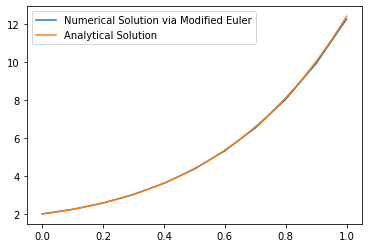

In [37]:
# ANALYTICAL SOLUTION (for comparison)
y_analytical = lambda t: (2 * np.exp(2*t)) - np.exp(t) + np.exp(-t)
t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)

plt.plot(t, num_sol, label = "Numerical Solution via Modified Euler")
plt.plot(t_act, y_act, label = "Analytical Solution")
plt.legend()

# Problem 2: BVP

We have the following BVP: $y'' = e^{2x} - x$, for $0 \leq x \leq 2$ and $y(0) = 0$ and $y(2) = -4$. We will be solving this using the finite difference method (FDM) with step size h = 0.05

### Initial Setup

In [148]:
# Our function / vector
def f(x):
    return np.exp(2 * x) - x

h = 0.05
t0 = 0
T = 2
interval = T-t0

# number of mesh points (N+1)
N = interval/h
mesh = int(N+1)

# generating t - domain array
t = np.linspace(t0,T, mesh)


# constructing the matrix A
A = np.zeros((len(t)-2, len(t)-2))

row = [0] * (len(t)-2)
row[0] = 1
row[1] = -2
row[2] = 1

for i in range(0, len(t)-2):
    A[i] = np.roll(row, i-1)

# fix roll over at first and last iteration
A[0][len(t)-3] = 0
A[len(t)-3][0] = 0

# setting up f_b
f_b = np.zeros((len(t)-2))

for i in range(len(f_b)):
    f_b[i] = f(t[i+1])

# add offset for last entry
f_b[len(f_b)-1] += (4/(h**2))  
print(f_b)

[1.05517092e+00 1.12140276e+00 1.19985881e+00 1.29182470e+00
 1.39872127e+00 1.52211880e+00 1.66375271e+00 1.82554093e+00
 2.00960311e+00 2.21828183e+00 2.45416602e+00 2.72011692e+00
 3.01929667e+00 3.35519997e+00 3.73168907e+00 4.15303242e+00
 4.62394739e+00 5.14964746e+00 5.73589444e+00 6.38905610e+00
 7.11616991e+00 7.92501350e+00 8.82418245e+00 9.82317638e+00
 1.09324940e+01 1.21637380e+01 1.35297317e+01 1.50446468e+01
 1.67241454e+01 1.85855369e+01 2.06479513e+01 2.29325302e+01
 2.54626389e+01 2.82641000e+01 3.13654520e+01 3.47982344e+01
 3.85973044e+01 4.28011845e+01 1.64745245e+03]


Now that we have all the components ready, we just perform a simple matrix multiplication between A' and f_b

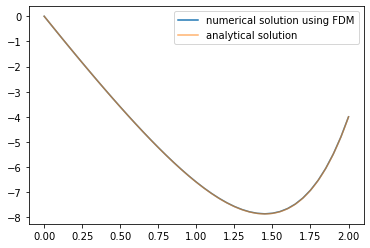

In [160]:
# ANALYTICAL SOLUTION (for comparison)
y_analytical = lambda x: (np.exp(2*x)/4) - ((x**3)/6) + ((-2 + (19/24) - np.exp(4)/8)*x) - (1/4)
t_act = np.linspace(t0,T, 200)
y_act = y_analytical(t_act)


A_inv = np.linalg.inv(A)
res = np.matmul(A_inv, f_b)
res = np.multiply(res, (h**2))
res = np.concatenate(([0],res,[-4]))


plt.plot(t, res, label = "numerical solution using FDM")
plt.plot(t_act, y_act, label  = "analytical solution", alpha = 0.6)
plt.legend()
